In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

In [16]:
# Load input features and target variables; Target variables is SM30 (soil moisture at 30 cm)
df = pd.read_csv('ML_Training_Selected.csv')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


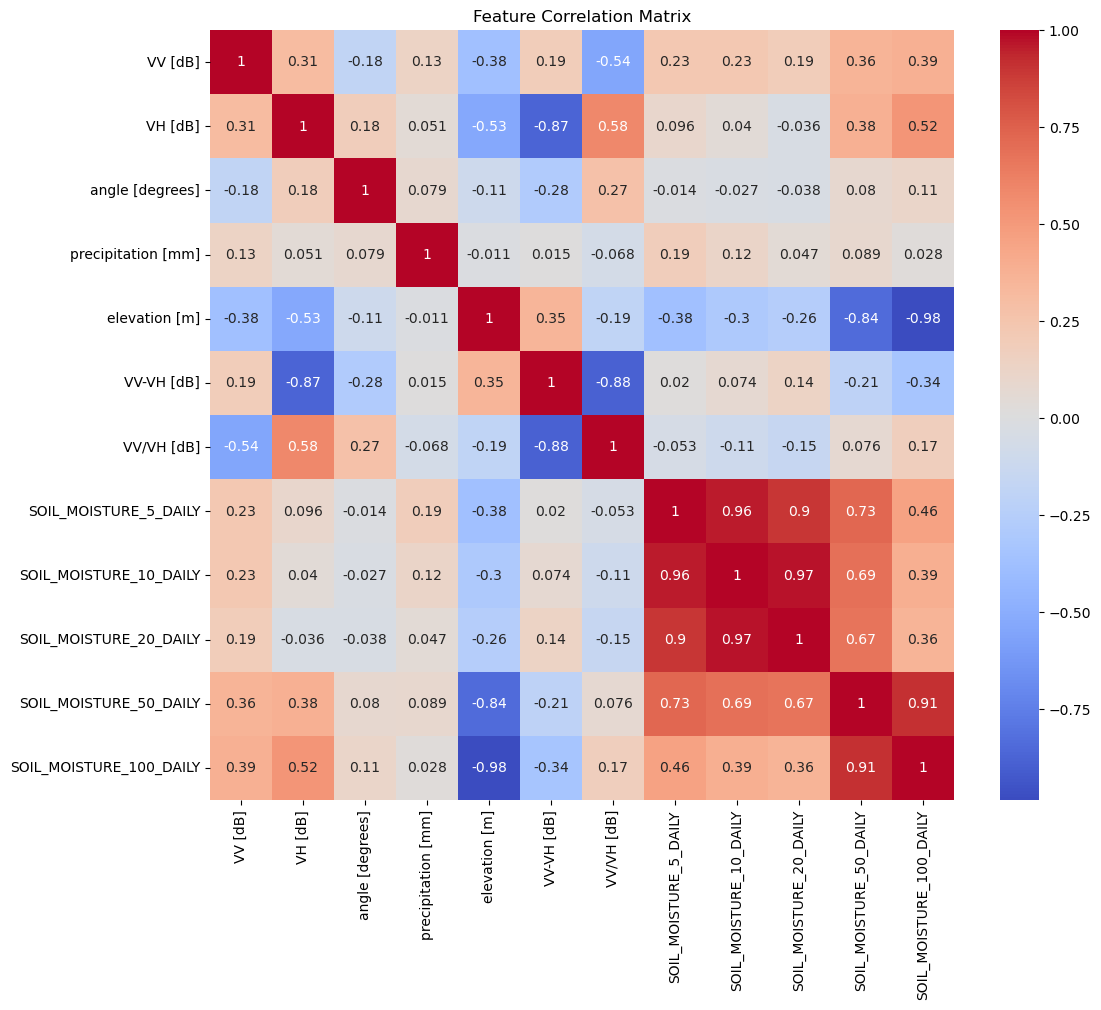

In [17]:

# Define input features (X) and target variable (y)
X = df[['VV [dB]', 'VH [dB]', 'angle [degrees]', 'precipitation [mm]', 'elevation [m]', 'VV-VH [dB]', 'VV/VH [dB]']]
y = df[['SOIL_MOISTURE_5_DAILY', 'SOIL_MOISTURE_10_DAILY', 'SOIL_MOISTURE_20_DAILY', 'SOIL_MOISTURE_50_DAILY', 'SOIL_MOISTURE_100_DAILY']]

# Normalize the elevation feature
scaler = StandardScaler()
X['elevation [m]'] = scaler.fit_transform(X[['elevation [m]']])

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y.mean(axis=1))

# 1. Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
import pandas as pd

# Assuming `df` is your DataFrame
# Step 1: Calculate SOIL_MOISTURE_15_DAILY
df['SOIL_MOISTURE_15_DAILY'] = (df['SOIL_MOISTURE_10_DAILY'] + df['SOIL_MOISTURE_20_DAILY']) / 2

# Step 2: Calculate SOIL_MOISTURE_75_DAILY
df['SOIL_MOISTURE_75_DAILY'] = (df['SOIL_MOISTURE_50_DAILY'] + df['SOIL_MOISTURE_100_DAILY']) / 2

# Step 3: Drop the original columns
df = df.drop(columns=['SOIL_MOISTURE_10_DAILY', 'SOIL_MOISTURE_20_DAILY', 'SOIL_MOISTURE_50_DAILY', 'SOIL_MOISTURE_100_DAILY'])
df

# The resulting DataFrame will now have SOIL_MOISTURE_5_DAILY, SOIL_MOISTURE_15_DAILY, and SOIL_MOISTURE_75_DAILY

,VV [dB],VH [dB],angle [degrees],precipitation [mm],elevation [m],VV-VH [dB],VV/VH [dB],SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_15_DAILY,SOIL_MOISTURE_75_DAILY
0,-11.920238,-26.572714,30.446728,0.000000,258,14.652476,0.448589,0.337,0.3265,0.1725
1,-12.778517,-24.697451,41.969181,15.178405,258,11.918935,0.517402,0.369,0.3440,0.1885
2,-8.453159,-17.009127,33.165001,0.000000,231,8.555968,0.496978,0.369,0.3270,0.3920
3,-8.351386,-13.462296,43.958626,4.296156,231,5.110910,0.620354,0.395,0.3440,0.3945
4,-8.719026,-13.603382,30.446655,10.896753,258,4.884356,0.640945,0.389,0.3675,0.2455
...,...,...,...,...,...,...,...,...,...,...
100,-14.141916,-26.019333,41.965168,0.000000,258,11.877417,0.543516,0.325,0.3240,0.1460
101,-10.871504,-13.117257,33.162994,0.000000,231,2.245753,0.828794,0.377,0.3405,0.3950
102,-13.491959,-21.079357,41.964264,0.000000,258,7.587398,0.640056,0.365,0.3515,0.2115
103,-11.457664,-11.973124,43.963783,0.000000,231,0.515460,0.956949,0.357,0.3250,0.3905



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


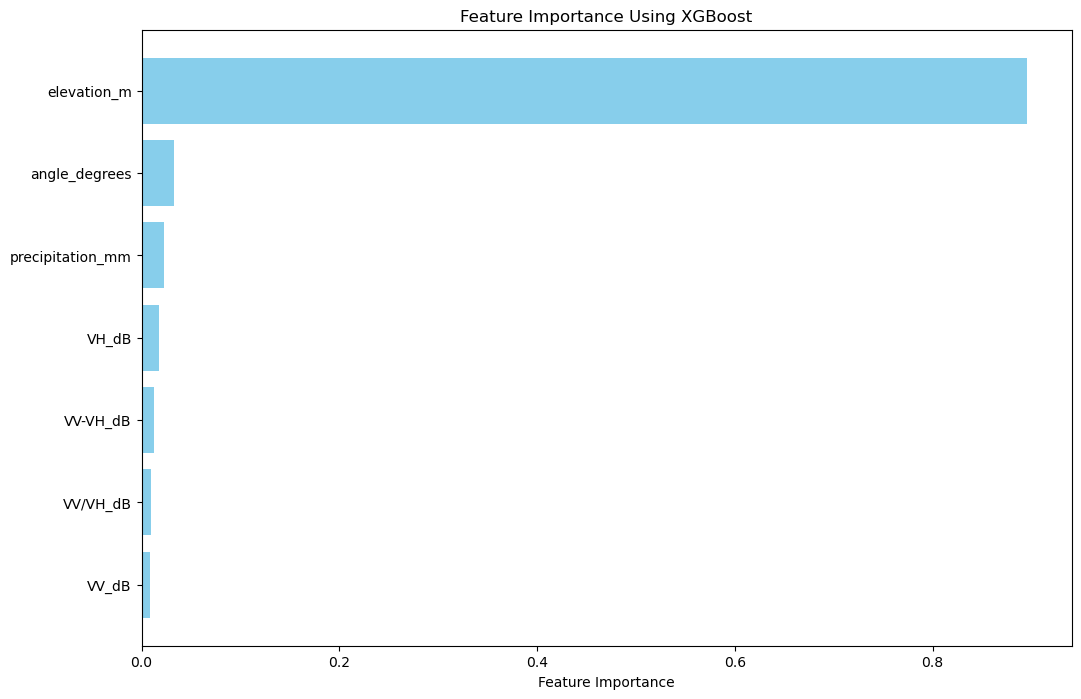

elevation_m: 0.8957
angle_degrees: 0.0328
precipitation_mm: 0.0230
VH_dB: 0.0179
VV-VH_dB: 0.0125
VV/VH_dB: 0.0100
VV_dB: 0.0081


In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Assuming `df` is your updated DataFrame with new soil moisture columns
# Rename columns to remove special characters
df_renamed = df.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace(' ', '_'))

# Define input features (X) and target variable (y)
X = df_renamed[['VV_dB', 'VH_dB', 'angle_degrees', 'precipitation_mm', 'elevation_m', 'VV-VH_dB', 'VV/VH_dB']]
y = df_renamed[['SOIL_MOISTURE_5_DAILY', 'SOIL_MOISTURE_15_DAILY', 'SOIL_MOISTURE_75_DAILY']]

# Normalize the elevation feature
scaler = StandardScaler()
X['elevation_m'] = scaler.fit_transform(X[['elevation_m']])

# Train the XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X, y.mean(axis=1))  # Use the mean of soil moisture columns as the target variable

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.title('Feature Importance Using XGBoost')
plt.show()

# Print feature importance values
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

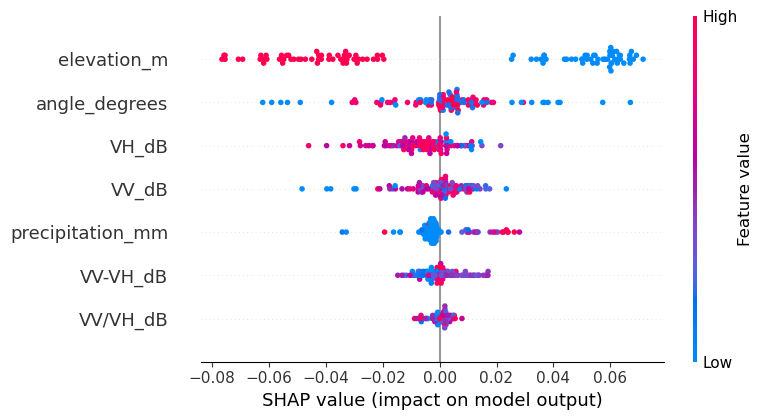

In [25]:
# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP Summary Plot
shap.summary_plot(shap_values, X, feature_names=feature_names)


# Model Training


## 1. TPE-GBM

In [30]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# For result reproducibility
random_seed = 42
np.random.seed(random_seed)

# Define input features (X) and target variable (y)
X = df_renamed[['VV_dB', 'VH_dB', 'angle_degrees', 'precipitation_mm', 'elevation_m', 'VV-VH_dB', 'VV/VH_dB']]
y = df_renamed[['SOIL_MOISTURE_5_DAILY', 'SOIL_MOISTURE_15_DAILY', 'SOIL_MOISTURE_75_DAILY']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Hyperparameter space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 300)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 8)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(3, 6)),
    'max_depth': hp.choice('max_depth', range(2, 4)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'subsample': hp.uniform('subsample', 0.05, 0.5),
    'random_state': 42,  # This can remain fixed for model stability
}

# Objective function to minimize with cross-validation
def objective(params):
    gbm = GradientBoostingRegressor(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
    min_rmse = float('inf')
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        # Train the model for each target variable separately
        rmse_list = []
        for col in y_train_kf.columns:
            gbm.fit(X_train_kf, y_train_kf[col])
            rmse = np.sqrt(mean_squared_error(y_test_kf[col], gbm.predict(X_test_kf)))
            rmse_list.append(rmse)
        min_rmse = min(min_rmse, min(rmse_list))
        min_rmse = min(min_rmse, rmse)
    return {'loss': min_rmse, 'status': STATUS_OK}

# Running the optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    rstate=np.random.default_rng(random_seed)  # Set the random state for hyperopt
)

# Mapping back to get the best parameters
best_params = {
    'n_estimators': range(50, 300)[best['n_estimators']],
    'min_samples_split': range(2, 8)[best['min_samples_split']],
    'min_samples_leaf': range(3, 6)[best['min_samples_leaf']],
    'max_depth': range(2, 4)[best['max_depth']],
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample']
}

# Define the final model with the best parameters
gbm_best = GradientBoostingRegressor(**best_params)

# Train the final model for each target variable separately
for col in y_train.columns:
    gbm_best.fit(X_train, y_train[col])
# Evaluate the model for each target variable separately
for col in y_test.columns:
    y_pred_gbm = gbm_best.predict(X_test)  # Predict for the current target variable
    r2 = r2_score(y_test[col], y_pred_gbm)
    mse = mean_squared_error(y_test[col], y_pred_gbm)
    rmse = np.sqrt(mse)
    print(f"Metrics for {col}:")
    print(f"  R²: {r2:.2f}")
    print(f"  RMSE: {rmse:.3f}")

# Displaying the best parameters
print("Best parameters found: ", best_params)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:23<00:00,  1.20trial/s, best loss: 0.02340590291559775]
Metrics for SOIL_MOISTURE_5_DAILY:
  R²: -2.77
  RMSE: 0.141
Metrics for SOIL_MOISTURE_15_DAILY:
  R²: -3.74
  RMSE: 0.135
Metrics for SOIL_MOISTURE_75_DAILY:
  R²: 0.81
  RMSE: 0.047
Best parameters found:  {'n_estimators': 126, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.06466330452808815, 'subsample': 0.306576656345253}


Training Metrics:
SOIL_MOISTURE_5_DAILY: R² = -0.515, RMSE = 0.100, RRMSE = 33.29%
SOIL_MOISTURE_15_DAILY: R² = -1.522, RMSE = 0.102, RRMSE = 35.71%
SOIL_MOISTURE_75_DAILY: R² = 0.981, RMSE = 0.016, RRMSE = 5.78%

Testing Metrics:
SOIL_MOISTURE_5_DAILY: R² = -2.769, RMSE = 0.141, RRMSE = 44.69%
SOIL_MOISTURE_15_DAILY: R² = -3.745, RMSE = 0.135, RRMSE = 44.59%
SOIL_MOISTURE_75_DAILY: R² = 0.810, RMSE = 0.047, RRMSE = 16.38%


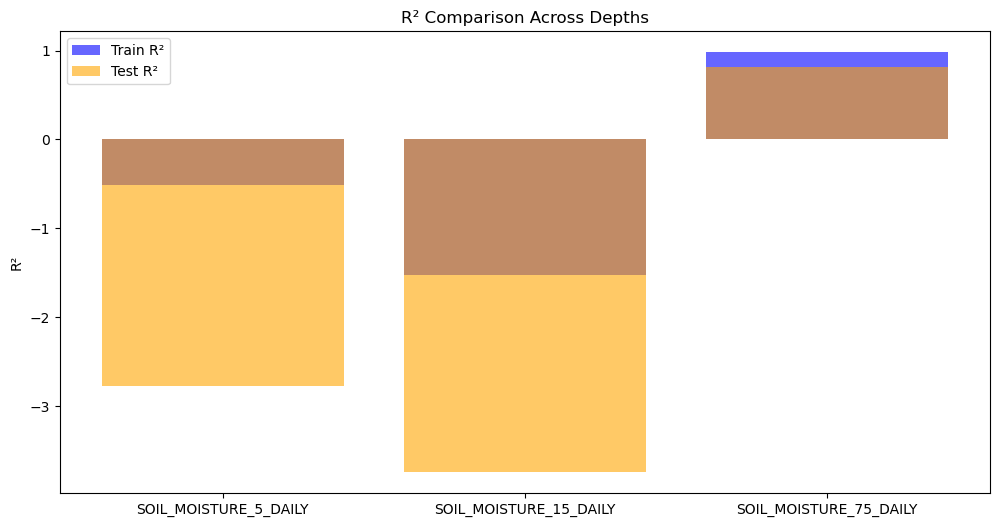

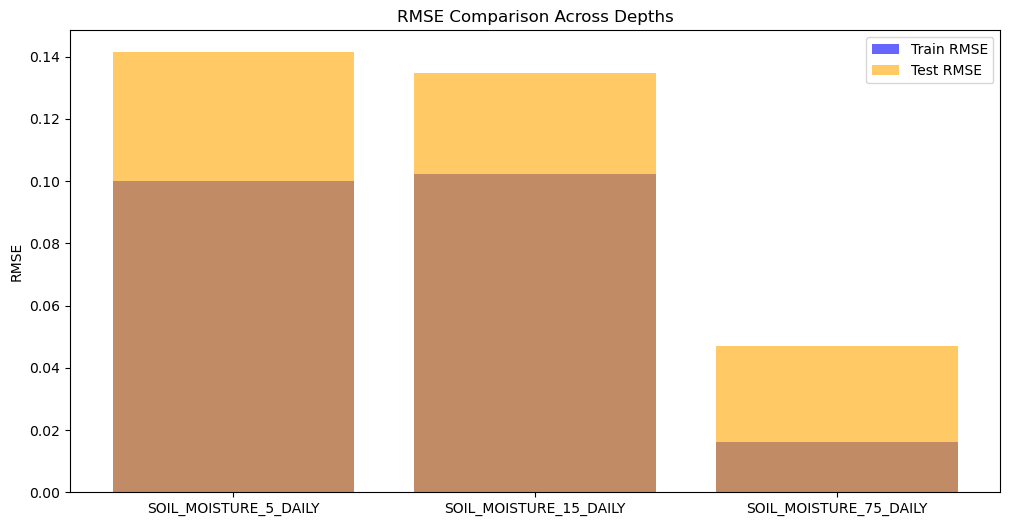

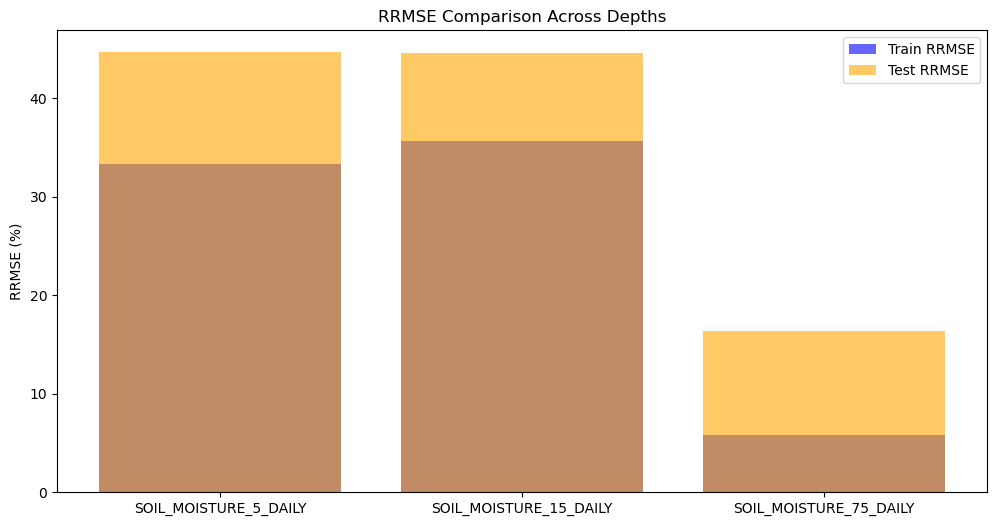

In [34]:
# Predict soil moisture for training and testing datasets
y_pred_train_gbm = gbm_best.predict(X_train)
y_pred_test_gbm = gbm_best.predict(X_test)

# Initialize dictionaries to store metrics for each depth
metrics_train = {}
metrics_test = {}

# Calculate metrics for each soil moisture depth
for i, col in enumerate(y.columns):
    # Training metrics
    r2_train = r2_score(y_train.iloc[:, i], y_pred_train_gbm)
    mse_train = mean_squared_error(y_train.iloc[:, i], y_pred_train_gbm)
    rmse_train = np.sqrt(mse_train)
    rrmse_train = rmse_train / np.mean(y_train.iloc[:, i]) * 100

    # Testing metrics
    r2_test = r2_score(y_test.iloc[:, i], y_pred_test_gbm)
    mse_test = mean_squared_error(y_test.iloc[:, i], y_pred_test_gbm)
    rmse_test = np.sqrt(mse_test)
    rrmse_test = rmse_test / np.mean(y_test.iloc[:, i]) * 100

    # Store metrics in dictionaries
    metrics_train[col] = {'R²': r2_train, 'RMSE': rmse_train, 'RRMSE': rrmse_train}
    metrics_test[col] = {'R²': r2_test, 'RMSE': rmse_test, 'RRMSE': rrmse_test}

# Print metrics for training and testing datasets
print("Training Metrics:")
for col, metrics in metrics_train.items():
    print(f"{col}: R² = {metrics['R²']:.3f}, RMSE = {metrics['RMSE']:.3f}, RRMSE = {metrics['RRMSE']:.2f}%")

print("\nTesting Metrics:")
for col, metrics in metrics_test.items():
    print(f"{col}: R² = {metrics['R²']:.3f}, RMSE = {metrics['RMSE']:.3f}, RRMSE = {metrics['RRMSE']:.2f}%")

# Visualize metrics for comparison
import matplotlib.pyplot as plt

# Prepare data for plotting
depths = y.columns
train_r2 = [metrics_train[depth]['R²'] for depth in depths]
test_r2 = [metrics_test[depth]['R²'] for depth in depths]
train_rmse = [metrics_train[depth]['RMSE'] for depth in depths]
test_rmse = [metrics_test[depth]['RMSE'] for depth in depths]
train_rrmse = [metrics_train[depth]['RRMSE'] for depth in depths]
test_rrmse = [metrics_test[depth]['RRMSE'] for depth in depths]

# Plot R² comparison
plt.figure(figsize=(12, 6))
plt.bar(depths, train_r2, alpha=0.6, label='Train R²', color='blue')
plt.bar(depths, test_r2, alpha=0.6, label='Test R²', color='orange')
plt.ylabel('R²')
plt.title('R² Comparison Across Depths')
plt.legend()
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(12, 6))
plt.bar(depths, train_rmse, alpha=0.6, label='Train RMSE', color='blue')
plt.bar(depths, test_rmse, alpha=0.6, label='Test RMSE', color='orange')
plt.ylabel('RMSE')
plt.title('RMSE Comparison Across Depths')
plt.legend()
plt.show()

# Plot RRMSE comparison
plt.figure(figsize=(12, 6))
plt.bar(depths, train_rrmse, alpha=0.6, label='Train RRMSE', color='blue')
plt.bar(depths, test_rrmse, alpha=0.6, label='Test RRMSE', color='orange')
plt.ylabel('RRMSE (%)')
plt.title('RRMSE Comparison Across Depths')
plt.legend()
plt.show()

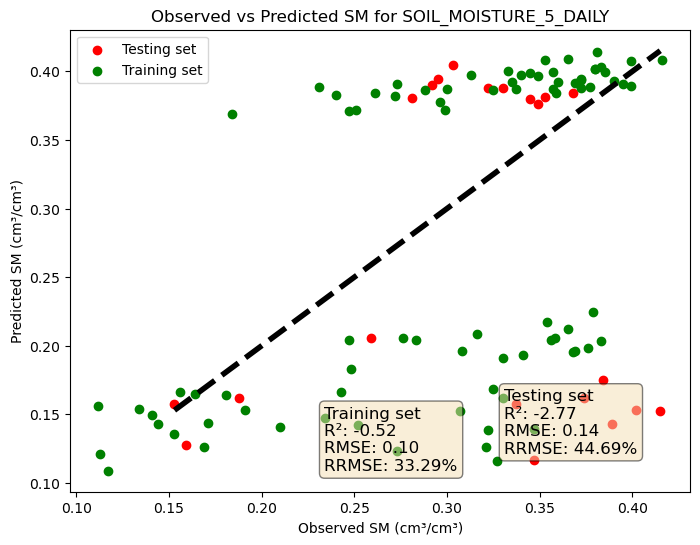

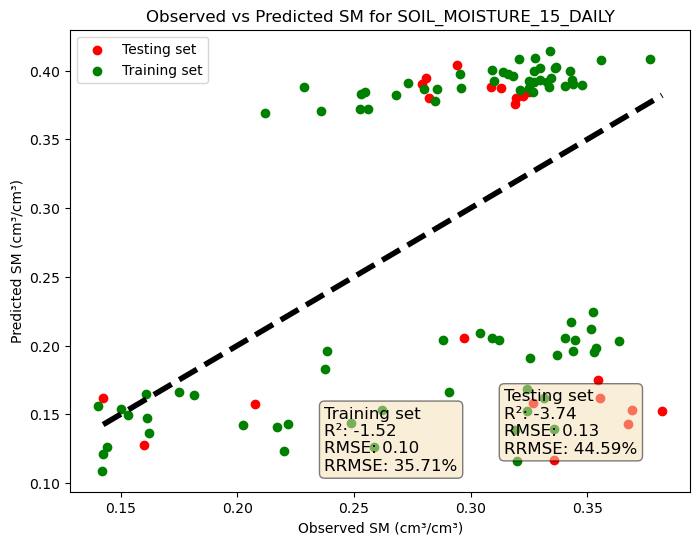

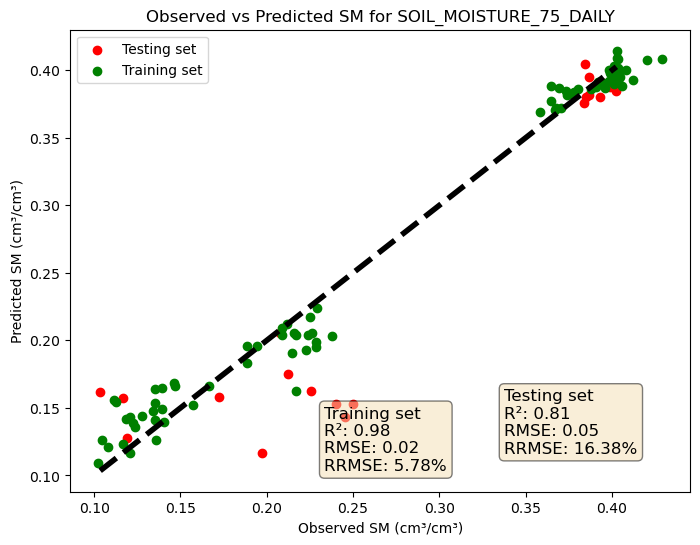

In [36]:
from matplotlib.ticker import FormatStrFormatter

# Iterate over all soil moisture depths
for i, col in enumerate(y.columns):
    # Extract observed and predicted values for the current depth
    y_train_obs = y_train.iloc[:, i]
    y_test_obs = y_test.iloc[:, i]
    y_train_pred = y_pred_train_gbm
    y_test_pred = y_pred_test_gbm

    # Calculate performance metrics for training and testing
    r2_train = r2_score(y_train_obs, y_train_pred)
    mse_train = mean_squared_error(y_train_obs, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    rrmse_train = rmse_train / np.mean(y_train_obs) * 100

    r2_test = r2_score(y_test_obs, y_test_pred)
    mse_test = mean_squared_error(y_test_obs, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    rrmse_test = rmse_test / np.mean(y_test_obs) * 100

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_obs, y_test_pred, color='red', label='Testing set')
    plt.scatter(y_train_obs, y_train_pred, color='green', label='Training set')
    plt.xlabel('Observed SM (cm³/cm³)')
    plt.ylabel('Predicted SM (cm³/cm³)')
    plt.title(f'Observed vs Predicted SM for {col}')
    plt.plot([y_test_obs.min(), y_test_obs.max()], [y_test_obs.min(), y_test_obs.max()], 'k--', lw=4)  # Reference line

    # Annotate the plot with performance metrics
    textstr_test = '\n'.join((
        'Testing set',
        f'R²: {r2_test:.2f}',
        f'RMSE: {rmse_test:.2f}',
        f'RRMSE: {rrmse_test:.2f}%'))
    textstr_train = '\n'.join((
        'Training set',
        f'R²: {r2_train:.2f}',
        f'RMSE: {rmse_train:.2f}',
        f'RRMSE: {rrmse_train:.2f}%'))

    # Add text boxes for metrics
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gca().text(0.70, 0.223, textstr_test, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=props)
    plt.gca().text(0.41, 0.04, textstr_train, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='bottom', bbox=props)

    # Set y-axis major formatter to 2 decimal places
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.legend(loc='upper left')
    plt.show()

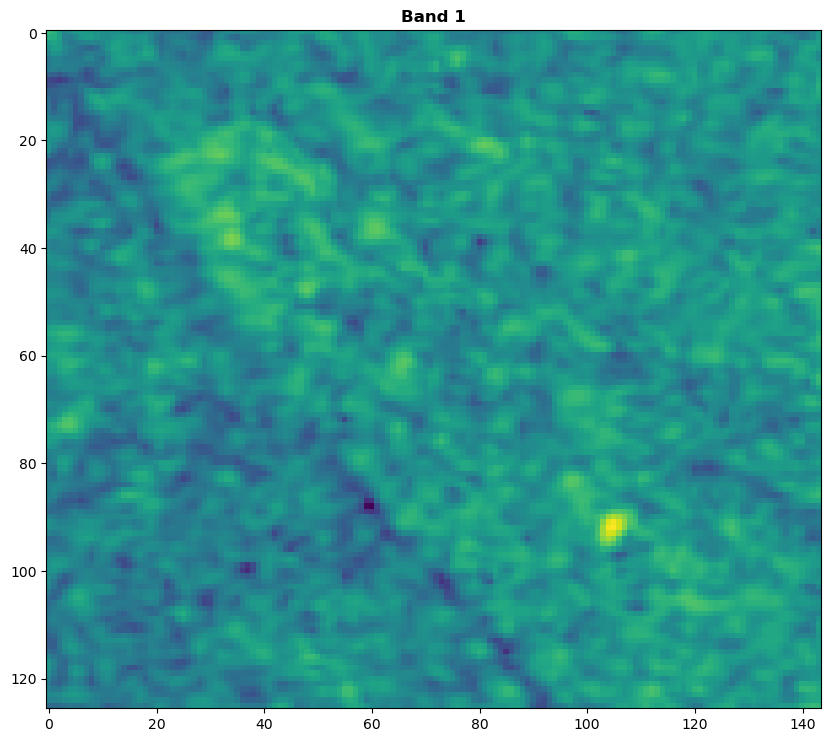

Band names: ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5']


In [37]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the TIFF file
file_path = 'FrankFort_Lexington_MultiBand_2024.tif'
with rasterio.open(file_path) as dataset:
    # Display the first band of the TIFF file
    plt.figure(figsize=(10, 10))
    show(dataset.read(1), title="Band 1")
    plt.show()
    
    # Print the band names
    band_names = [f"Band {i}" for i in range(1, dataset.count + 1)]
    print("Band names:", band_names)

In [39]:
import rasterio
import numpy as np
from rasterio.transform import from_origin

# Open the input TIFF file
with rasterio.open(file_path) as dataset:
    # Read all bands into a numpy array
    raster_data = dataset.read()

# Calculate VV-VH and VV/VH bands
vv_vh_band = raster_data[0] - raster_data[1]  # VV-VH
vv_div_vh_band = raster_data[0] / raster_data[1]  # VV/VH

# Stack the bands in the specified order
new_bands = [
    raster_data[0],  # VV [dB]
    raster_data[1],  # VH [dB]
    raster_data[2],  # angle [degrees]
    raster_data[3],  # precipitation [mm]
    raster_data[4],  # elevation [m]
    vv_vh_band,      # VV-VH [dB]
    vv_div_vh_band   # VV/VH [dB]
]
new_bands = np.stack(new_bands)

# Define metadata for the new TIFF
new_meta = dataset.meta.copy()
new_meta.update({
    "count": len(new_bands),  # Number of bands
    "dtype": new_bands.dtype  # Data type of the bands
})

# Write the new TIFF file
output_file = "Updated_Frankfor_Lexington.tif"
with rasterio.open(output_file, "w", **new_meta) as dst:
    for i in range(len(new_bands)):
        dst.write(new_bands[i], i + 1)  # Write each band to the file

print(f"New TIFF file created: {output_file}")

New TIFF file created: Updated_Frankfor_Lexington.tif


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


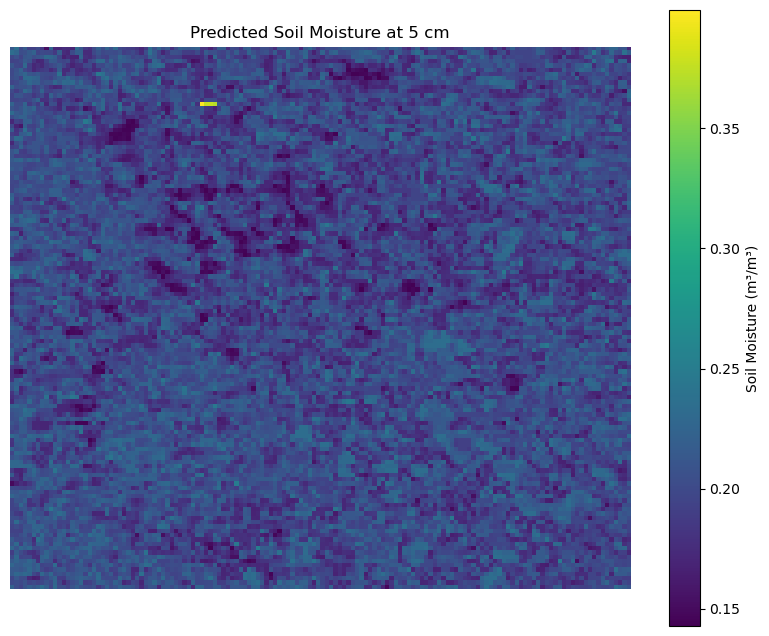

Predicted soil moisture map saved: Soil_Moisture_5.tif


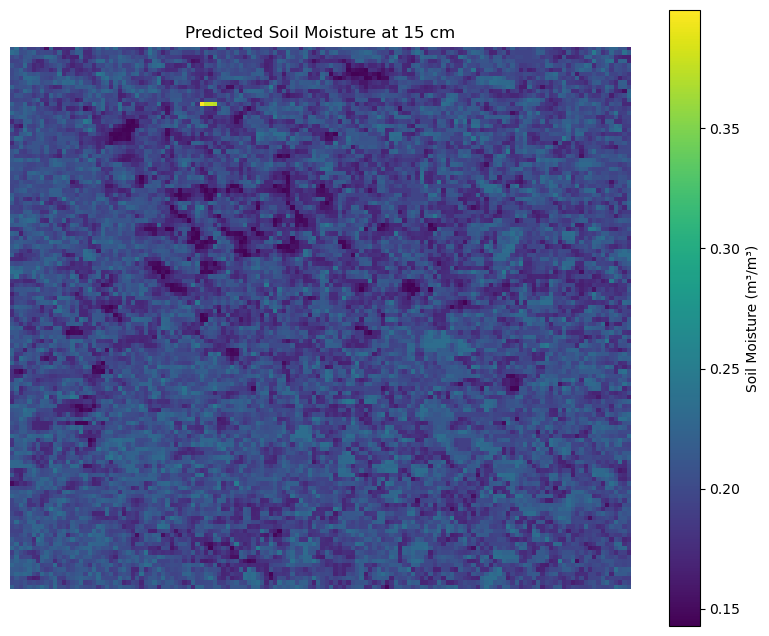

Predicted soil moisture map saved: Soil_Moisture_15.tif


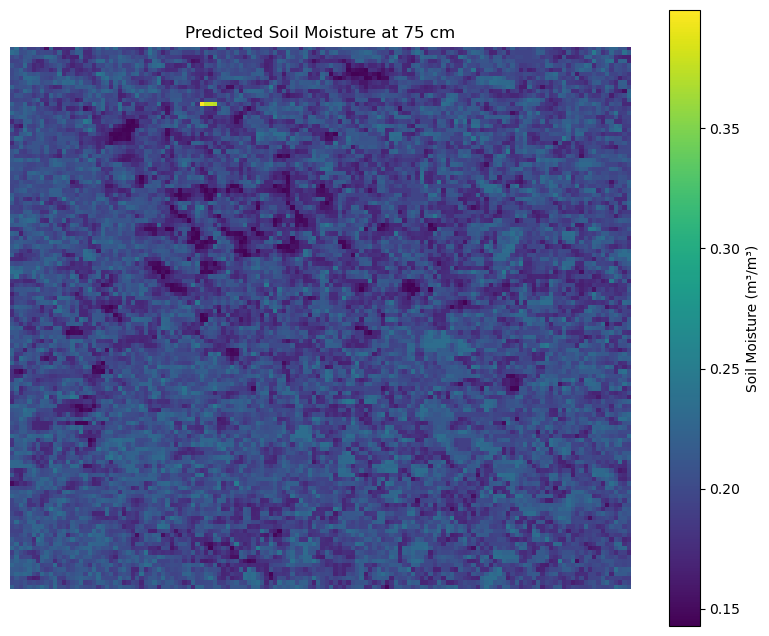

Predicted soil moisture map saved: Soil_Moisture_75.tif


In [43]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the updated TIFF file
with rasterio.open("Updated_Frankfor_Lexington.tif") as src:
    # Read all bands into a numpy array
    bands = src.read()

# Transpose the bands to have shape (rows, cols, bands)
bands = np.transpose(bands, (1, 2, 0))

# Reshape the data for prediction (rows * cols, bands)
rows, cols, num_bands = bands.shape
reshaped_data = bands.reshape(-1, num_bands)

# Predict soil moisture for each pixel using the trained model
predicted_soil_moisture = np.zeros((reshaped_data.shape[0], 3))  # 3 depths: 5, 15, 75
for i, col in enumerate(y_train.columns):
    predicted_soil_moisture[:, i] = gbm_best.predict(reshaped_data)

# Reshape the predictions back to the original raster shape
predicted_soil_moisture = predicted_soil_moisture.reshape(rows, cols, 3)

# Plot and save the predicted soil moisture for the three depths
depths = ['5 cm', '15 cm', '75 cm']
output_files = ["Soil_Moisture_5.tif", "Soil_Moisture_15.tif", "Soil_Moisture_75.tif"]

for i in range(3):  # Iterate over the three depths
    # Plot the predicted soil moisture
    plt.figure(figsize=(10, 8))
    plt.imshow(predicted_soil_moisture[:, :, i], cmap='viridis')
    plt.colorbar(label='Soil Moisture (m³/m³)')
    plt.title(f"Predicted Soil Moisture at {depths[i]}")
    plt.axis('off')
    plt.show()

    # Save the predicted soil moisture as a new TIFF file
    with rasterio.open(
        output_files[i],
        "w",
        driver="GTiff",
        height=rows,
        width=cols,
        count=1,
        dtype=predicted_soil_moisture.dtype,
        crs=src.crs,
        transform=src.transform,
    ) as dst:
        dst.write(predicted_soil_moisture[:, :, i], 1)

    print(f"Predicted soil moisture map saved: {output_files[i]}")

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


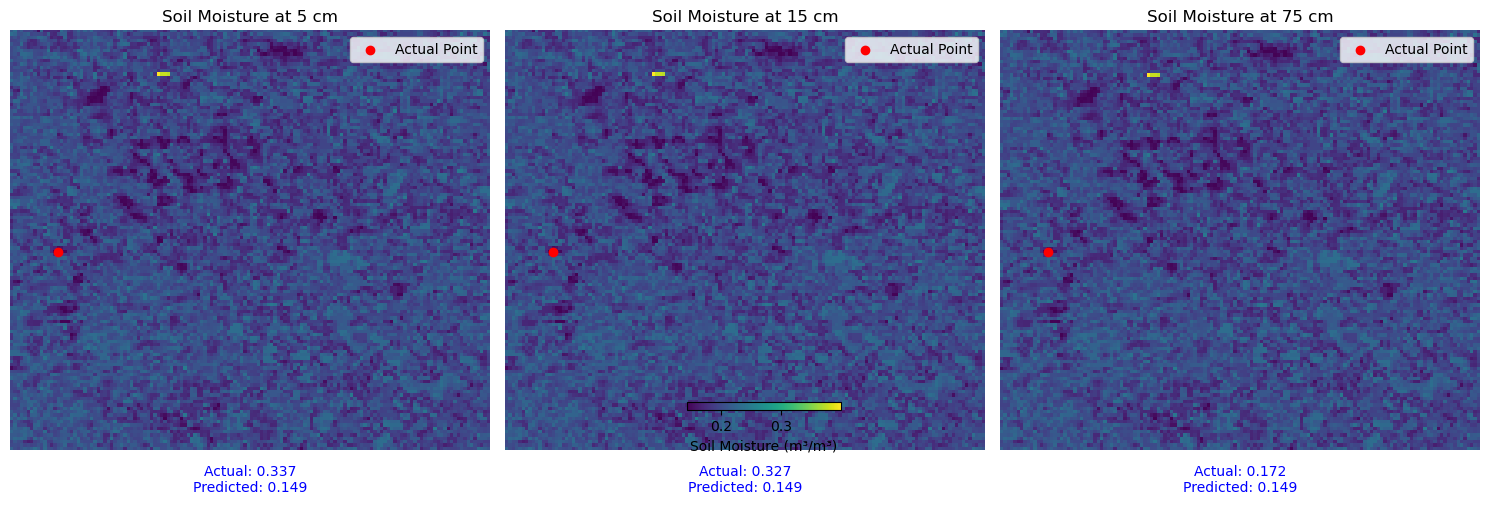

Actual soil moisture values (m³/m³): [0.337  0.3265 0.1725]
Predicted soil moisture values (m³/m³): [0.14913462 0.14913462 0.14913462]
RMSE for all depths: 0.1498


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the cleaned in-situ soil moisture data
insitu_data = pd.read_csv("cleaned_Insitu_SM_2024_ILINKS.csv")

# Step 1: Calculate SOIL_MOISTURE_15_DAILY
insitu_data['SOIL_MOISTURE_15_DAILY'] = (insitu_data['SOIL_MOISTURE_10_DAILY'] + insitu_data['SOIL_MOISTURE_20_DAILY']) / 2

# Step 2: Calculate SOIL_MOISTURE_75_DAILY
insitu_data['SOIL_MOISTURE_75_DAILY'] = (insitu_data['SOIL_MOISTURE_50_DAILY'] + insitu_data['SOIL_MOISTURE_100_DAILY']) / 2

# Extract the actual soil moisture values for the specified location and date
latitude = 38.09
longitude = -84.75
date = 20240101

actual_point = insitu_data[(insitu_data['LATITUDE'] == latitude) & 
                           (insitu_data['LONGITUDE'] == longitude) & 
                           (insitu_data['LST_DATE'] == date)]

# Extract the actual soil moisture values for the three depths
actual_values = actual_point[['SOIL_MOISTURE_5_DAILY', 'SOIL_MOISTURE_15_DAILY', 
                               'SOIL_MOISTURE_75_DAILY']].values.flatten()

# Assuming the predicted soil moisture values are stored in `predicted_soil_moisture`
# Find the pixel corresponding to the specified latitude and longitude
lat_idx = int((latitude - dataset.bounds.top) / dataset.res[1])
lon_idx = int((dataset.bounds.left - longitude) / dataset.res[0])

# Predicted soil moisture values at the specified location for the three depths
predicted_values = predicted_soil_moisture[lat_idx, lon_idx, :3]  # Extract only the first 3 depths

# Calculate RMSE for the three depths
rmse_all_depths = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Plot the predicted soil moisture for the three depths
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figure size and layout
depths = ['5 cm', '15 cm', '75 cm']

for i, ax in enumerate(axes):  # Iterate over the three depths
    im = ax.imshow(predicted_soil_moisture[:, :, i], cmap='viridis')
    ax.set_title(f"Soil Moisture at {depths[i]}")
    ax.axis('off')
    # Overlay the actual point and display actual vs predicted values
    ax.scatter(lon_idx, lat_idx, color='red', label='Actual Point')
    ax.legend()
    ax.text(0.5, -0.1, f"Actual: {actual_values[i]:.3f}\nPredicted: {predicted_values[i]:.3f}", 
            transform=ax.transAxes, fontsize=10, ha='center', color='blue')

# Add a colorbar to the figure
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('Soil Moisture (m³/m³)')

plt.tight_layout()
plt.show()

# Display the results
print("Actual soil moisture values (m³/m³):", actual_values)
print("Predicted soil moisture values (m³/m³):", predicted_values)
print(f"RMSE for all depths: {rmse_all_depths:.4f}")